## Chi-Square Test

Example from book "Practical Statistics for Data Scientists" (124 - 126):

In [1]:
import pandas as pd

# observed results
Click = [14, 8, 12]

#Click = [14, 14, 14]
#Click = [0, 100, 980]

No_click = [986, 992, 988]
observed = pd.DataFrame([Click, No_click],
                           columns = ["A", "B", "C"],
                           index = ["Click", "No-click"])
observed

,A,B,C
Click,14,8,12
No-click,986,992,988


In [97]:
# expected results
exp_clicks = sum(Click)/3
exp_no_click = sum(No_click)/3

Click = [14, 8, 12]
No_click = [986, 992, 988]
expected = pd.DataFrame([[exp_clicks, exp_clicks, exp_clicks], [exp_no_click, exp_no_click, exp_no_click]],
                           columns = ["A", "B", "C"],
                           index = ["Click", "No-click"])
expected

,A,B,C
Click,11.333333,11.333333,11.333333
No-click,988.666667,988.666667,988.666667


In [98]:
observed - expected

,A,B,C
Click,2.666667,-3.333333,0.666667
No-click,-2.666667,3.333333,-0.666667


The Pearson residual measures the extent to which the actual counts differ from the expected counts.

In [99]:
# Pearson Residual
import numpy as np
def pearson_residuals(obs, exp):
    return (obs - exp) / (np.sqrt(exp))

R = pearson_residuals(observed, expected)
R

,A,B,C
Click,0.792118,-0.990148,0.198030
No-click,-0.084809,0.106012,-0.021202


The **chi-square statistic** is the sum of the squared Pearson residuals

In [100]:
R = R**2
chi2observed = R.A.sum() + R.B.sum() + R.C.sum()
chi2observed

1.6659394708658917

What we want to know is... could this divergence from the expected counts (expressed by the `1.666` chi2 statistic we found) happen by chance? Or would it be too unlikely?

## Resampling approach

In [25]:
Click

[14, 8, 12]

In [26]:
No_click

[986, 992, 988]

In [51]:
import random
# create a "box" with 34 cliks (1) and 2966 no-clicks (0)
box = [1] * 34
box.extend([0]*2966)
random.shuffle(box)
#print(box)

In [104]:
# extract 3 samples of 1000, count the clicks and no-clicks on each
sample_clicks = [sum(random.sample(box, 1000)),
                 sum(random.sample(box, 1000)),
                 sum(random.sample(box, 1000))]

sample_noclicks = [1000 - n for n in sample_clicks]

print(sample_clicks)
print(sample_noclicks)

[13, 16, 11]
[987, 984, 989]


In [105]:
observed_2 = pd.DataFrame([sample_clicks, sample_noclicks],
                        columns = ["A", "B", "C"],
                        index = ["Click", "No-click"])
observed_2

,A,B,C
Click,13,16,11
No-click,987,984,989


In [106]:
R = pearson_residuals(observed_2, expected)
R = R**2
R.A.sum() + R.B.sum() + R.C.sum()

2.2014200150727836

Whole resampling process, many times. Count how many times the chi score is higher than the observed chi score. The proportion of times this happens is our p-value.

In [126]:
chi_scores = []

for i in range(10000):
    sample_clicks = [sum(random.sample(box, 1000)),
                         sum(random.sample(box, 1000)),
                         sum(random.sample(box, 1000))]

    sample_noclicks = [1000 - n for n in sample_clicks]

    observed_ = pd.DataFrame([sample_clicks, sample_noclicks],
                            columns = ["A", "B", "C"],
                            index = ["Click", "No-click"])

    R = pearson_residuals(observed_, expected)
    R = R**2

    chi_scores.append(R.A.sum() + R.B.sum() + R.C.sum())

We can check how the distribution of the chi scores from the simulations approaches a chi-square distribution with degrees_of_freedom = (rows - 1) * (columns -1).

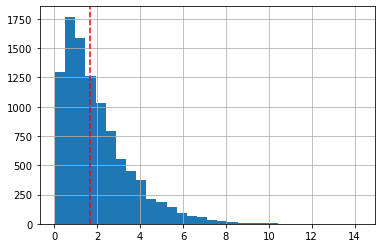

In [131]:
import matplotlib.pyplot as plt
pd.Series(chi_scores).hist(bins=30);
plt.axvline(chi2observed, color="red", linestyle="--");

The p-value is the proportion of the area to the left of the observed chi-square score (`1.67`):

In [132]:
resampled_p_value = sum(chi_scores >= chi2observed) / len(chi_scores)
resampled_p_value

0.4794

In a world where the null hypothesis is true, there is a 48% chance of getting a result as extreme or more than the observed.

## Theoretical approach

In [73]:
from scipy import stats
chisq, pvalue, df, expected = stats.chi2_contingency(observed)
pvalue

0.4347562562343731

In [74]:
chisq

1.6659394708658917

In [114]:
df

2